[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Train Soccer Pitch Keypoint Detector

---

[![Download Dataset](https://app.roboflow.com/images/download-dataset-badge.svg)](https://universe.roboflow.com/roboflow-jvuqo/football-field-detection-f07vi)

This notebook is based on the [How to Train a YOLOv8 Keypint Detection Model](https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-keypoint.ipynb) notebook from the [roboflow/notebooks](https://github.com/roboflow/notebooks) repository.

## Configure API keys

- Open your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Oct 23 20:31:49 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 561.09                 Driver Version: 561.09         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   49C    P8             N/A /  115W |     668MiB /   8188MiB |     12%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\isss1\GitHub\soccer-computer-vision-analysis


## Install dependencies

In [ ]:
%pip uninstall ultralytics
%pip install roboflow ultralytics==8.0.196

^C
Note: you may need to restart the kernel to use updated packages.


## Imports

In [3]:
from roboflow import Roboflow
from IPython.display import Image

import ultralytics
print(ultralytics.__version__)


8.0.196


## Pull dataset

In [4]:
import os

!mkdir {HOME}/datasets
%cd {HOME}/datasets

ROBOFLOW_API_KEY = os.environ['ROBOFLOW_API_KEY']
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("soccercomputervision-twrd5").project("soccer-field-detection-sbywb")
version = project.version(6)
dataset = version.download("yolov8")

The syntax of the command is incorrect.This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.



[WinError 2] The system cannot find the file specified: 'c:\\Users\\isss1\\GitHub\\soccer-computer-vision-analysis/datasets'
c:\Users\isss1\GitHub\soccer-computer-vision-analysis
loading Roboflow workspace...
loading Roboflow project...


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.

In [5]:
import re

def update_yaml_paths(file_path):
    # Read the file content
    with open(file_path, 'r') as f:
        content = f.read()

    # Update the 'train' path
    content = re.sub(r'^(train:\s*).*$', r'\1../train/images', content, flags=re.MULTILINE)

    # Update the 'val' path
    content = re.sub(r'^(val:\s*).*$', r'\1../valid/images', content, flags=re.MULTILINE)

    # Write the updated content back to the file
    with open(file_path, 'w') as f:
        f.write(content)

# Usage example
dataset_location = "soccer-field-detection-6"  # Replace with the actual path
update_yaml_paths(f"{dataset_location}/data.yaml")


## Custom training

In [7]:
%cd {HOME}

print("Training model, this should take a while...")
# Increased batch and epochs size substantially for better model training
# Adding pre-trained parameter and patience to 500 epochs
!yolo task=pose mode=train model=yolov8x-pose.pt data={dataset.location}/data.yaml batch=24 epochs=500 patience=500 imgsz=640 mosaic=0.0 plots=True
print("Training finished...")

c:\Users\isss1\GitHub\soccer-computer-vision-analysis
Training model, this should take a while...


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


Training finished...


C:\Users\isss1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues

In [6]:
import torch
if torch.cuda.is_available():
    print("CUDA is available. Training on GPU!")
else:
    print("CUDA is not available. Training on CPU.")


CUDA is available. Training on GPU!


In [8]:
import os

home = os.getcwd()  # Get the HOME environment variable
directory = os.path.join(home, "runs/pose/train14")  # Construct the path

# List all files and directories in the specified directory
files = os.listdir(directory)

for file in files:
    print(file)


args.yaml
BoxF1_curve.png
BoxPR_curve.png
BoxP_curve.png
BoxR_curve.png
confusion_matrix.png
confusion_matrix_normalized.png
labels.jpg
labels_correlogram.jpg
PoseF1_curve.png
PosePR_curve.png
PoseP_curve.png
PoseR_curve.png
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
train_batch4410.jpg
train_batch4411.jpg
train_batch4412.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
val_batch1_labels.jpg
val_batch1_pred.jpg
weights


c:\Users\isss1\GitHub\soccer-computer-vision-analysis


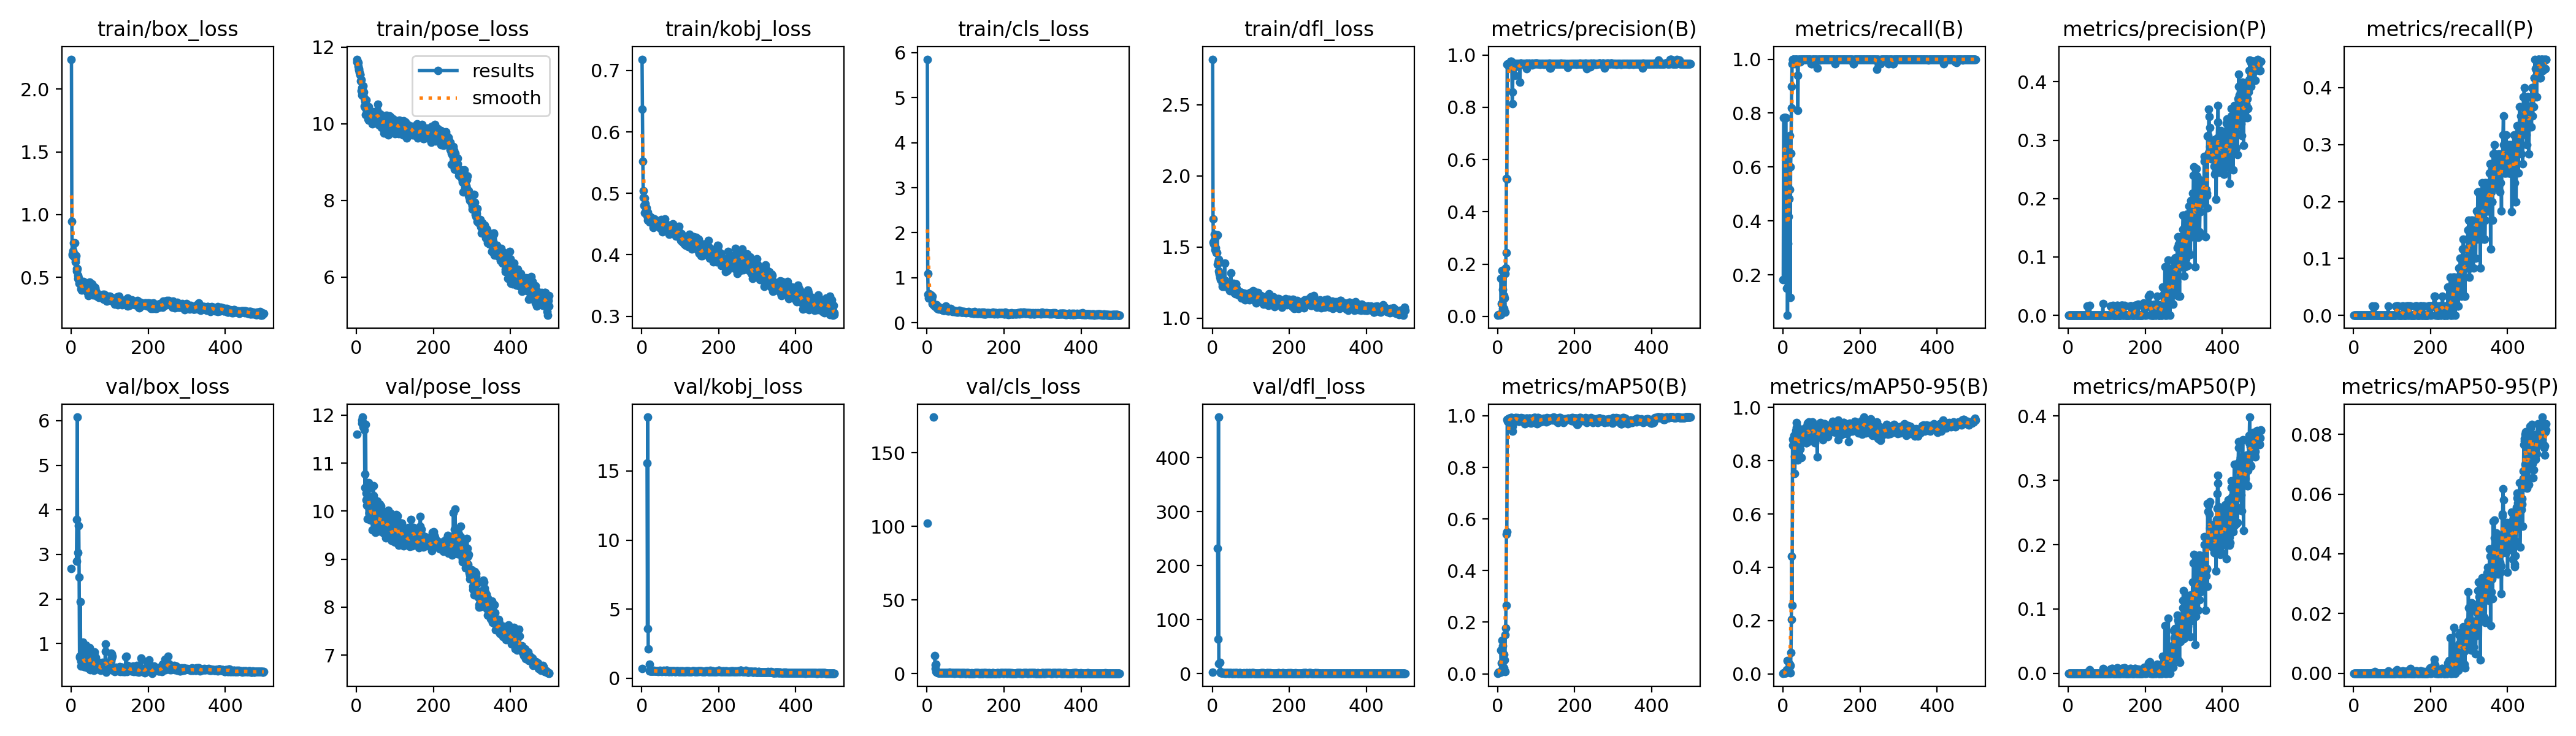

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train14/results.png', width=600)

c:\Users\isss1\GitHub\soccer-computer-vision-analysis


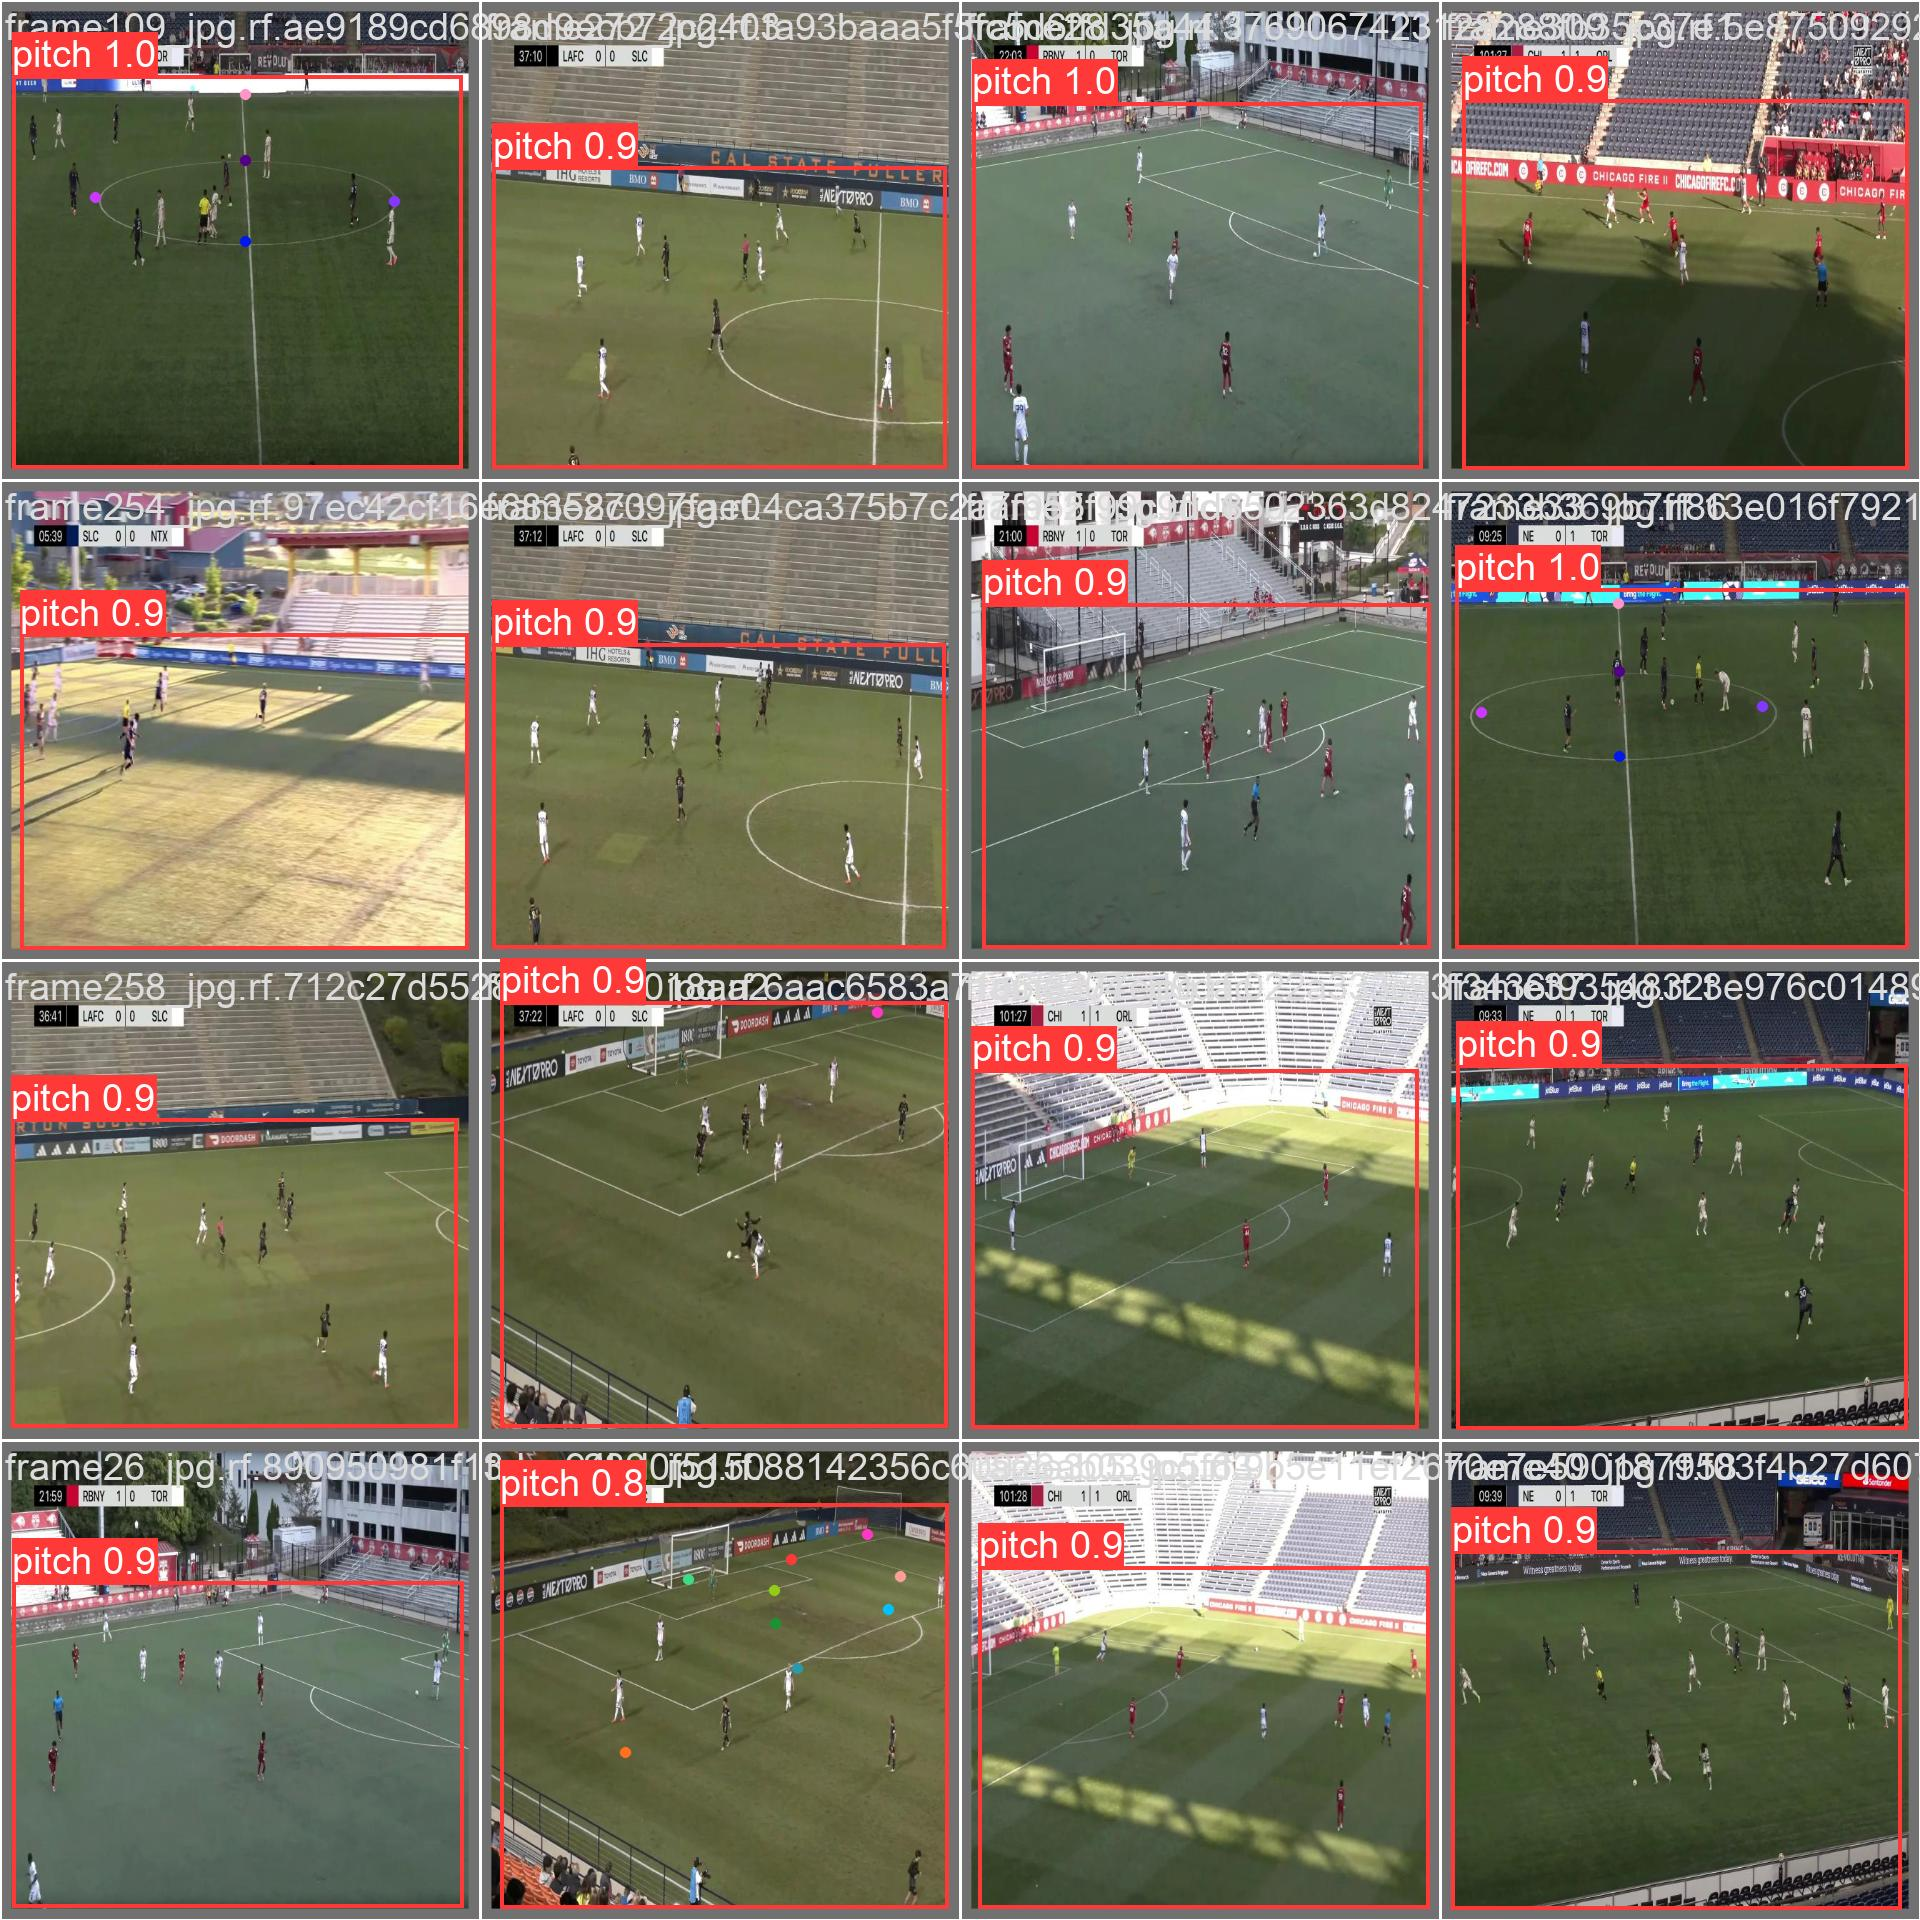

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train14/val_batch0_pred.jpg', width=600)

## Validate custom model

In [11]:
%cd {HOME}

!yolo task=pose mode=val model={HOME}/runs/pose/train14/weights/best.pt data={dataset.location}/data.yaml

c:\Users\isss1\GitHub\soccer-computer-vision-analysis


C:\Users\isss1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ultralytics\nn\tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues

## Deploy model on Roboflow

In [12]:
project.version(dataset.version).deploy(model_type="yolov8-pose", model_path=f"{HOME}/runs/pose/train14/")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


View the status of your deployment at: https://app.roboflow.com/soccercomputervision-twrd5/soccer-field-detection-sbywb/6
Share your model with the world at: https://universe.roboflow.com/soccercomputervision-twrd5/soccer-field-detection-sbywb/model/6


In [14]:
# latest_version = project.versions  # Fetch the most recent version

print(project.version(2))

# print(f"Project Name: {project.name}")
# print(f"Latest Version: {latest_version.version}")
# print(f"Version Status: {latest_version.status}")  # e.g., 'Active', 'Training Complete'
# print(f"Model Download URL: {latest_version.model_url}")



{
  "name": "soccer-field-detection",
  "type": "keypoint-detection",
  "version": "2",
  "augmentation": {},
  "created": 1729104347.301,
  "preprocessing": {
    "auto-orient": true,
    "resize": {
      "format": "Stretch to",
      "width": 640,
      "height": 640
    }
  },
  "splits": {
    "valid": 22,
    "test": 10,
    "train": 73
  },
  "workspace": "soccercomputervision-twrd5"
}
